In [51]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Section 1: Dataset Loading

In [53]:
df = pd.read_csv(
    "sms_spam_balanced.csv"
)


In [54]:
df.head()

,label,message
0,spam,FREE Amazon voucher! Text Q36ZAP8 to 992008593...
1,ham,Still work going on:)it is very small house.
2,spam,CLAIM your cinema passes NOW! One-time offer. ...
3,ham,Were somewhere on Fredericksburg
4,ham,We can make a baby in yo tho


In [55]:
df.shape

(75000, 2)

## 1.1 Basic Statistical Summary

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    75000 non-null  object
 1   message  75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [57]:
df['label'].value_counts()

label
ham     42000
spam    33000
Name: count, dtype: int64

In [58]:
# Check percentage distribution of labels
df['label'].value_counts(normalize=True) * 100

label
ham     56.0
spam    44.0
Name: proportion, dtype: float64

In [59]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [60]:
# Count of each sentiment class
sentiment_counts = df['label'].value_counts()
# Display counts
sentiment_counts

label
ham     42000
spam    33000
Name: count, dtype: int64

## 1.2 Class balance check

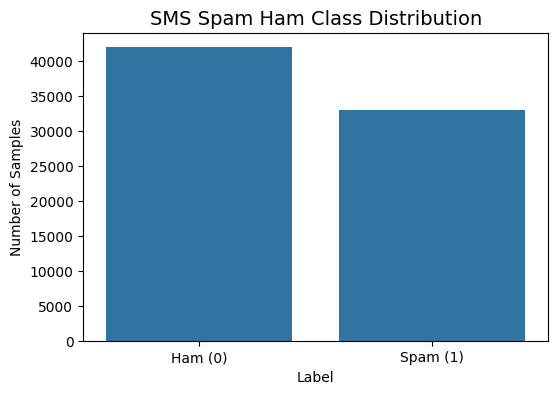

In [63]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values
)
plt.title("SMS Spam Ham Class Distribution", fontsize=14)
plt.xlabel("Label")
plt.ylabel("Number of Samples")
plt.xticks([0,1], ['Ham (0)', 'Spam (1)'])
plt.show()

In [64]:
def check_dataset_balance(labels, threshold=0.20):
    
    class_dist = labels.value_counts(normalize=True)
    imbalance_ratio = class_dist.max() - class_dist.min()
    
    print("Class Distribution (Percentage):")
    print((class_dist * 100).round(2))
    print("\nImbalance Ratio:", round(imbalance_ratio * 100, 2), "%")
    
    # Balance decision
    if imbalance_ratio <= threshold:
        print("\n Dataset is BALANCED.")
    else:
        print("\n Dataset is IMBALANCED.")

check_dataset_balance(df['label'])

Class Distribution (Percentage):
label
ham     56.0
spam    44.0
Name: proportion, dtype: float64

Imbalance Ratio: 12.0 %

 Dataset is BALANCED.


# Section 2: Data Cleaning and Text Preprocessing

In [65]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pragyarayamajhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pragyarayamajhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pragyarayamajhi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [66]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

## 2.1 applying preprocessing to dataset

In [67]:
# Apply text cleaning to the Text column
df['cleaned_text'] = df['message'].apply(clean_text)

# Display sample comparison
df[['message', 'cleaned_text']].head()

,message,cleaned_text
0,FREE Amazon voucher! Text Q36ZAP8 to 992008593...,free amazon voucher text qzap claim cost p per...
1,Still work going on:)it is very small house.,still work going onit small house
2,CLAIM your cinema passes NOW! One-time offer. ...,claim cinema pass onetime offer call term cond...
3,Were somewhere on Fredericksburg,somewhere fredericksburg
4,We can make a baby in yo tho,make baby yo tho


## 2.2 Text Length Analysis (Before & After Cleaning)

In [68]:
# Text length before cleaning
df['text_length_raw'] = df['message'].apply(lambda x: len(x.split()))

# Text length after cleaning
df['text_length_cleaned'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Display summary statistics
df[['text_length_raw', 'text_length_cleaned']].describe()

,text_length_raw,text_length_cleaned
count,75000.000000,75000.000000
mean,13.427547,8.019973
std,8.855596,4.965409
min,1.000000,0.000000
25%,9.000000,5.000000
50%,12.000000,7.000000
75%,14.000000,9.000000
max,171.000000,80.000000


## 2.3 Text Length Analysis – Seaborn & Matplotlib Visualizations

### 2.3.1 Histogram Comparison (Before vs After Cleaning) – Seaborn

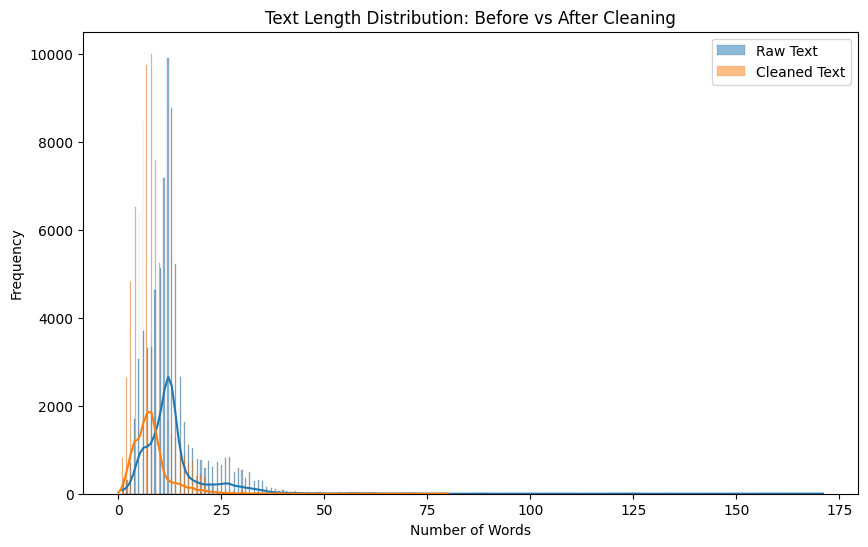

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['text_length_raw'], label='Raw Text', kde=True)
sns.histplot(df['text_length_cleaned'], label='Cleaned Text', kde=True)
plt.legend()
plt.title("Text Length Distribution: Before vs After Cleaning")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### 2.3.2 Boxplot Comparison – Seaborn

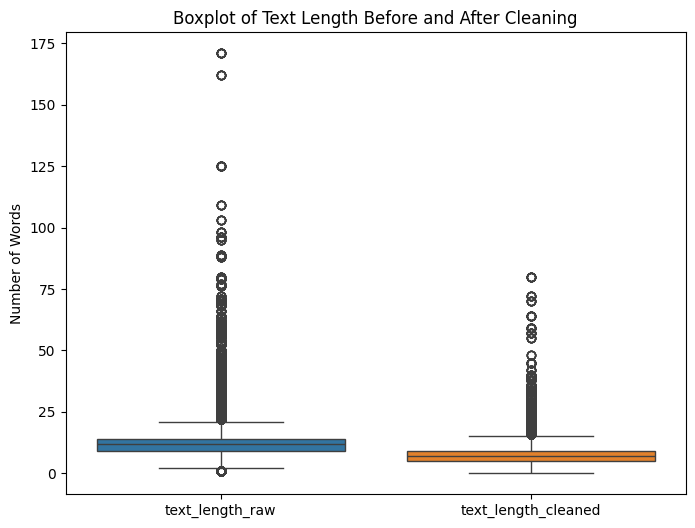

In [70]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['text_length_raw', 'text_length_cleaned']])
plt.title("Boxplot of Text Length Before and After Cleaning")
plt.ylabel("Number of Words")
plt.show()

### 2.3.3 Violin Plot (Distribution Shape) – Seaborn

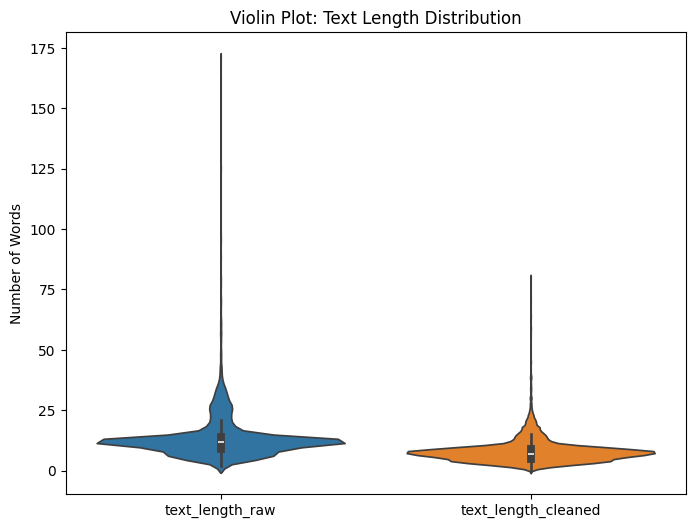

In [71]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df[['text_length_raw', 'text_length_cleaned']])
plt.title("Violin Plot: Text Length Distribution")
plt.ylabel("Number of Words")
plt.show()

### 2.3.4 Mean Text Length Comparison – Matplotlib

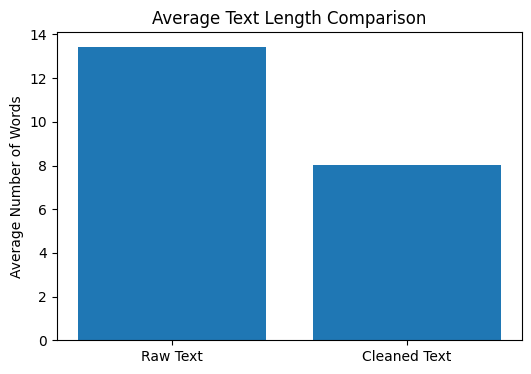

In [72]:
mean_raw = df['text_length_raw'].mean()
mean_cleaned = df['text_length_cleaned'].mean()

plt.figure(figsize=(6,4))
plt.bar(['Raw Text', 'Cleaned Text'], [mean_raw, mean_cleaned])
plt.title("Average Text Length Comparison")
plt.ylabel("Average Number of Words")
plt.show()

### 2.3.5 Label-wise Text Length

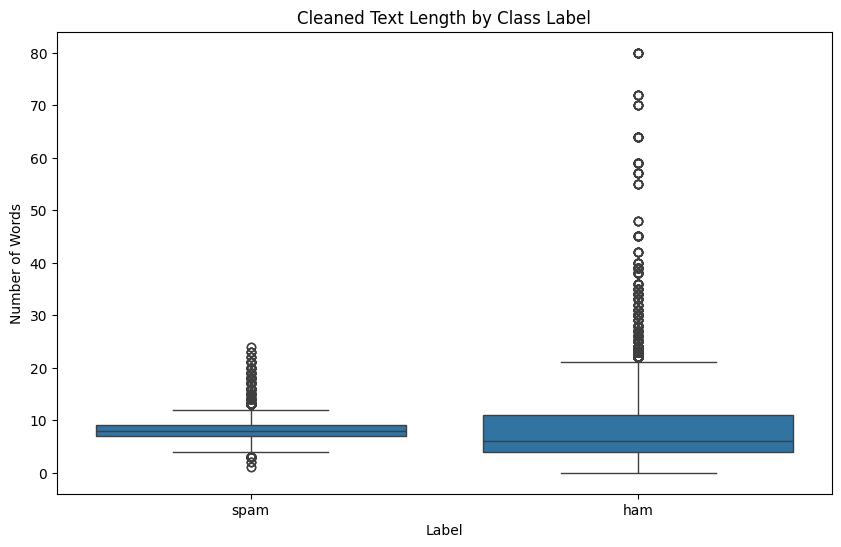

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='text_length_cleaned', data=df)
plt.title("Cleaned Text Length by Class Label")
plt.xlabel("Label")
plt.ylabel("Number of Words")
plt.show()

# Section 3: Feature Engineering and model training

## 3.1 Feature and Target Separation

In [74]:
# Feature (independent variable)
X = df['cleaned_text']

# Target (dependent variable)
y = df['label']

# Verify shapes
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (75000,)
Target shape: (75000,)


In [75]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode target labels
y_encoded = label_encoder.fit_transform(y)

# Mapping check
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'ham': np.int64(0), 'spam': np.int64(1)}

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

# Fit and transform text data
X_tfidf = tfidf.fit_transform(X)

# Check TF-IDF matrix shape
X_tfidf.shape

(75000, 5000)

## 3.2 Train–Test Split

In [77]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Verify split sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (60000, 5000)
Testing set size: (15000, 5000)


## 3.3 Train Models on Training Data

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [79]:
# Initialize models
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

naive_bayes = MultinomialNB()

In [80]:
# Train Logistic Regression
log_reg.fit(X_train, y_train)

# Train Naive Bayes
naive_bayes.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [81]:
# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)

In [82]:
from sklearn.metrics import classification_report

print("Baseline Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))

Baseline Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8400
           1       0.99      0.99      0.99      6600

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



# 4 Model Evaluation

## 4.1 Confusion Matrix Visualization

In [83]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)

## Logistic Regression Confusion Matrix

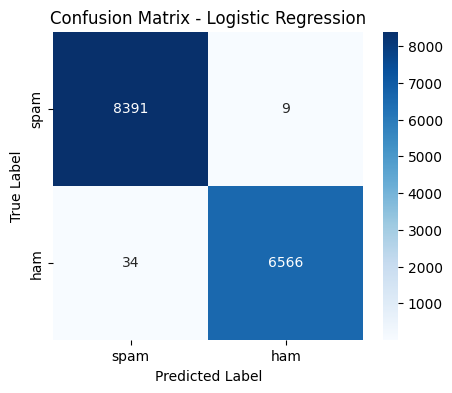

In [84]:
plt.figure(figsize=(5,4))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['spam', 'ham'],
    yticklabels=['spam', 'ham']
)

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Naive Bayes Confusion Matrix

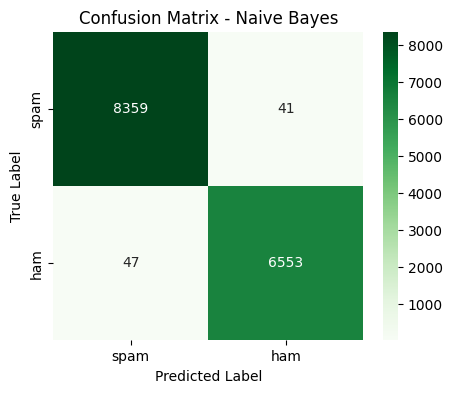

In [85]:
plt.figure(figsize=(5,4))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['spam', 'ham'],
    yticklabels=['spam', 'ham']
)

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 4.2 ROC Curve and AUC Score

In [86]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
y_prob_nb = naive_bayes.predict_proba(X_test)[:,1]

# Compute ROC values
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)

auc_lr = auc(fpr_lr, tpr_lr)
auc_nb = auc(fpr_nb, tpr_nb)

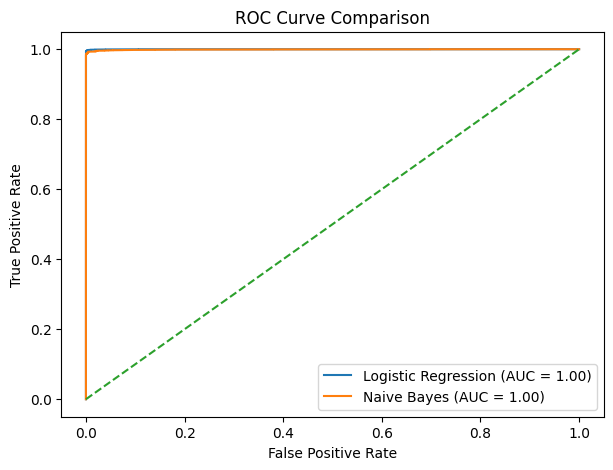

In [87]:
# Plot ROC curves
plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0,1], [0,1], linestyle='--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [88]:
# Create evaluation summary table
evaluation_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_nb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_nb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_nb)
    ],
    'AUC': [auc_lr, auc_nb]
})

evaluation_summary

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.997133,0.998631,0.994848,0.996736,0.999789
1,Naive Bayes,0.994133,0.993782,0.992879,0.993330,0.999178


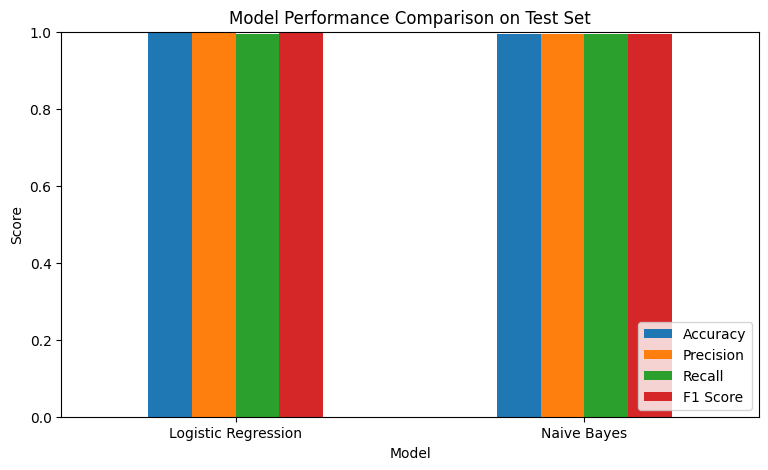

In [89]:
metrics_df = evaluation_summary.set_index('Model')

metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar',
    figsize=(9,5)
)

plt.title("Model Performance Comparison on Test Set")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Section 5: Hyperparameter Tuning and Performance Enhancement

## 5.1 Hyperparameter Tuning: Logistic Regression

In [90]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Grid Search
lr_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=lr_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit grid search
lr_grid.fit(X_train, y_train)

# Best parameters
lr_grid.best_params_

{'C': 10, 'solver': 'liblinear'}

In [91]:
best_lr = lr_grid.best_estimator_

## 5.2 Hyperparameter Tuning: Naive Bayes

In [92]:
nb_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]
}

# Grid Search
nb_grid = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=nb_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit grid search
nb_grid.fit(X_train, y_train)

# Best parameters
nb_grid.best_params_

{'alpha': 0.01}

In [93]:
best_nb = nb_grid.best_estimator_

## 5.3 Evaluate Tuned Models on Test Set

In [94]:
y_pred_lr_tuned = best_lr.predict(X_test)
y_pred_nb_tuned = best_nb.predict(X_test)

## 5.4 Performance Comparison: Before vs After Tuning

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create comparison table
tuning_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    
    'Accuracy (Before)': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Accuracy (After)': [
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_nb_tuned)
    ],
    
    'F1 Score (Before)': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_nb)
    ],
    'F1 Score (After)': [
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_nb_tuned)
    ]
})

tuning_comparison

,Model,Accuracy (Before),Accuracy (After),F1 Score (Before),F1 Score (After)
0,Logistic Regression,0.997133,0.998733,0.996736,0.998559
1,Naive Bayes,0.994133,0.994333,0.993330,0.993559


## 5.5 Visualization: Impact of Hyperparameter Tuning

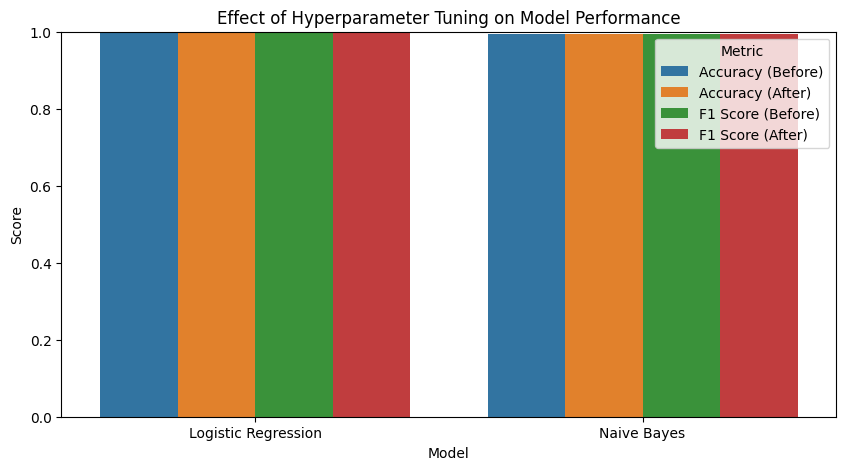

In [96]:
plot_df = tuning_comparison.melt(
    id_vars='Model',
    value_vars=['Accuracy (Before)', 'Accuracy (After)', 
                'F1 Score (Before)', 'F1 Score (After)'],
    var_name='Metric',
    value_name='Score'
)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(
    x='Model',
    y='Score',
    hue='Metric',
    data=plot_df
)

plt.title("Effect of Hyperparameter Tuning on Model Performance")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

## 5.6 Hyperparameter Value vs Performance (Line Plot)

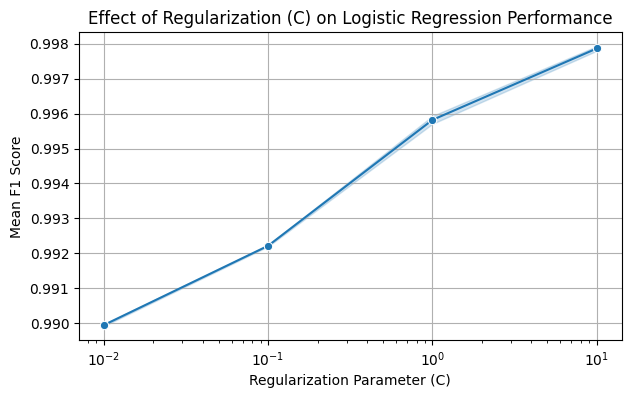

In [97]:
lr_results = pd.DataFrame(lr_grid.cv_results_)

# Plot C vs mean F1 score
plt.figure(figsize=(7,4))
sns.lineplot(
    x=lr_results['param_C'].astype(float),
    y=lr_results['mean_test_score'],
    marker='o'
)

plt.xscale('log')
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Mean F1 Score")
plt.title("Effect of Regularization (C) on Logistic Regression Performance")
plt.grid(True)
plt.show()

## 5.7 Naive Bayes Smoothing Effect (Line Plot)

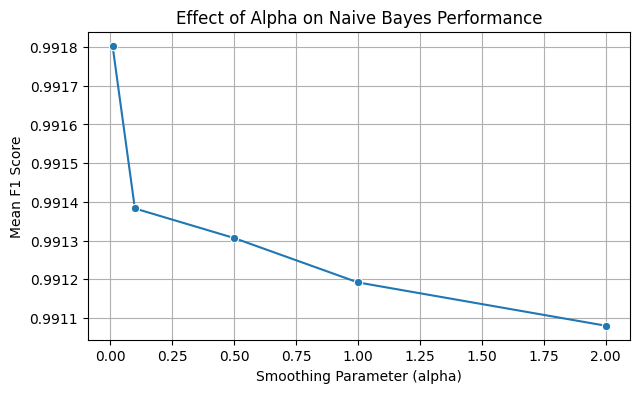

In [98]:
# Extract NB GridSearch results
nb_results = pd.DataFrame(nb_grid.cv_results_)

plt.figure(figsize=(7,4))
sns.lineplot(
    x=nb_results['param_alpha'].astype(float),
    y=nb_results['mean_test_score'],
    marker='o'
)

plt.xlabel("Smoothing Parameter (alpha)")
plt.ylabel("Mean F1 Score")
plt.title("Effect of Alpha on Naive Bayes Performance")
plt.grid(True)
plt.show()

## 5.8 ROC Curve: Tuned vs Untuned Logistic Regression

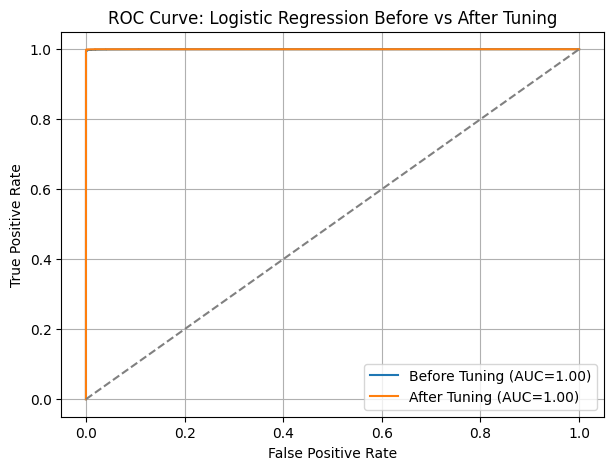

In [99]:
# Predicted probabilities
y_prob_lr_tuned = best_lr.predict_proba(X_test)[:,1]

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_lr_tuned)
auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f'Before Tuning (AUC={auc_lr:.2f})')
plt.plot(fpr_tuned, tpr_tuned, label=f'After Tuning (AUC={auc_tuned:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression Before vs After Tuning")
plt.legend()
plt.grid(True)
plt.show()

## 5.9 ROC Curve: Tuned vs Untuned Naive Bayes

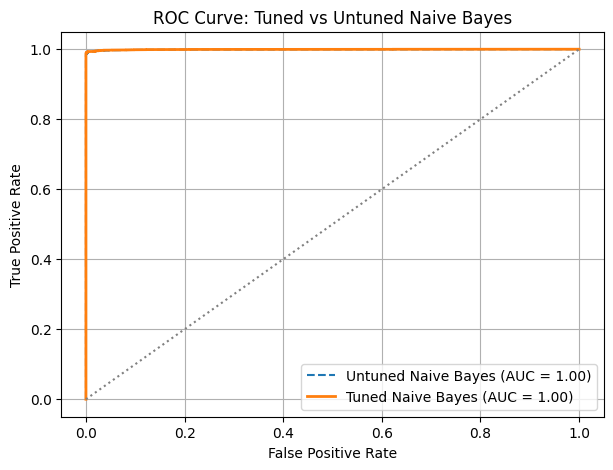

In [100]:
from sklearn.metrics import roc_curve, auc

# Untuned Naive Bayes probabilities
y_prob_nb_untuned = naive_bayes.predict_proba(X_test)[:, 1]

# Tuned Naive Bayes probabilities
y_prob_nb_tuned = best_nb.predict_proba(X_test)[:, 1]

# ROC values
fpr_nb_untuned, tpr_nb_untuned, _ = roc_curve(y_test, y_prob_nb_untuned)
fpr_nb_tuned, tpr_nb_tuned, _ = roc_curve(y_test, y_prob_nb_tuned)

# AUC scores
auc_nb_untuned = auc(fpr_nb_untuned, tpr_nb_untuned)
auc_nb_tuned = auc(fpr_nb_tuned, tpr_nb_tuned)

# Plot ROC curves
plt.figure(figsize=(7,5))

plt.plot(
    fpr_nb_untuned, tpr_nb_untuned,
    linestyle='--',
    label=f'Untuned Naive Bayes (AUC = {auc_nb_untuned:.2f})'
)

plt.plot(
    fpr_nb_tuned, tpr_nb_tuned,
    linewidth=2,
    label=f'Tuned Naive Bayes (AUC = {auc_nb_tuned:.2f})'
)

plt.plot([0,1], [0,1], linestyle=':', color='gray')

plt.title("ROC Curve: Tuned vs Untuned Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()